<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">9.5.Deep_Learning-LSTM(Aumento_Datos_SlidingWindows)</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [1]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [2]:
datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_std_after_resampled = pd.read_csv('../datos/csv/datosEEG_std_after_resampled.csv', sep=',')
datosEEG_std_before_resampled = pd.read_csv('../datos/csv/datosEEG_std_before_resampled.csv', sep=',')
datosEEG_std_tres_segmentos = pd.read_csv('../datos/csv/datosEEG_std_tres_segmentos.csv', sep=',')

datosEEG_all = [datosEEG_std_after_resampled, datosEEG_std_before_resampled]

nombre_clases = valores_key(datosEEG_seg1_standarizado)

# LSTM (Long short-term memory)

In [3]:
model_lstm_rs_sw = crear_modelo_LSTM(TIMESTEPS, FEATURES, NUM_CLASES)

C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


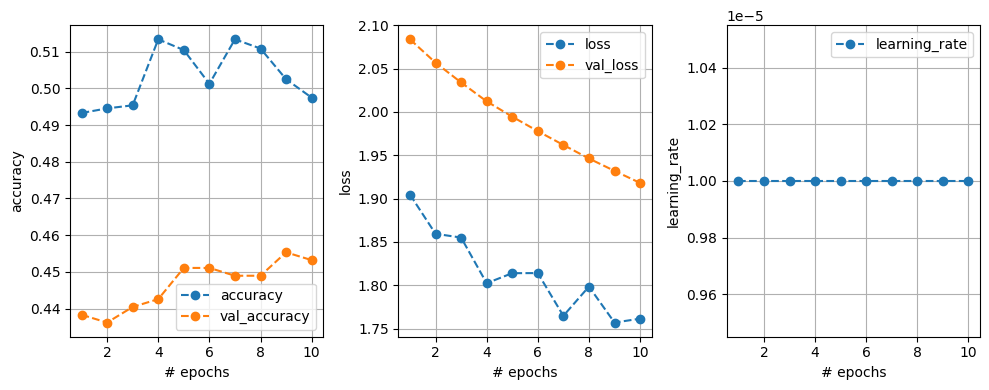

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4924 - loss: 1.8095 - val_accuracy: 0.4532 - val_loss: 1.9181 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [4]:
accuracy_score_lstm_rs_sw = []
accuracy_score_test_lstm_rs_sw =[]
matriz_confusion_lstm_rs_sw = []
matriz_confusion_test_lstm_rs_sw = []
total_simple_lstm_rs_sw_trained = []

for dataset in datosEEG_all:   
       
    train_datos, val_datos, test_datos = dividir_datos_deep(dataset, TARGET)
    
    columns = train_datos.columns[train_datos.columns != TARGET]
    
    X_train, y_train = preparar_ventanas(train_datos[columns], train_datos[TARGET], WINDOWS_SIZE, OVERLAP )
    X_val, y_val = preparar_ventanas(val_datos[columns], val_datos[TARGET], WINDOWS_SIZE, OVERLAP )
    X_test, y_test = preparar_ventanas(test_datos[columns], test_datos[TARGET], WINDOWS_SIZE, OVERLAP )
            
    # Entrenar el modelo
    model_lstm_trained_rs_sw = model_lstm_rs_sw.fit(X_train, y_train, epochs=100, batch_size=30, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint, plot_learning])
    
    y_pred = model_lstm_rs_sw.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    y_pred_test = model_lstm_rs_sw.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)

    accuracy_score_lstm_rs_sw.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_lstm_rs_sw.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_lstm_rs_sw.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_lstm_rs_sw.append(confusion_matrix(y_test, y_pred_classes_test))
    
    total_simple_lstm_rs_sw_trained.append(model_lstm_trained_rs_sw)


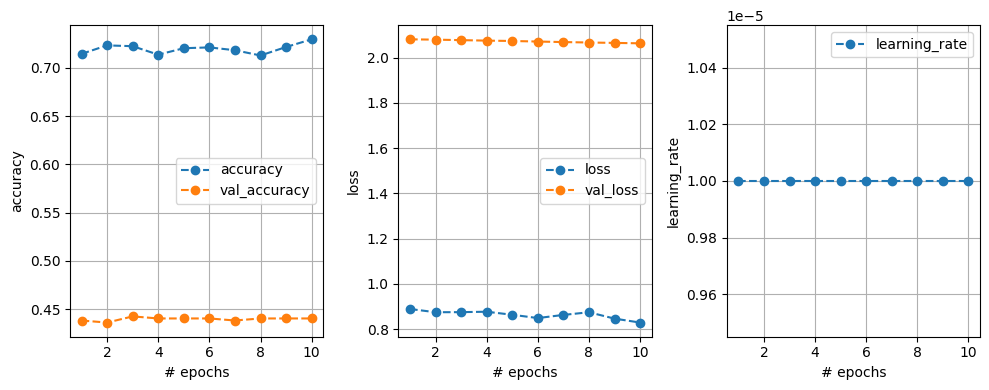

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7269 - loss: 0.8168 - val_accuracy: 0.4404 - val_loss: 2.0628 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [5]:

train_datos, val_datoS =  dividir_datos_deep_sr_wd(datosEEG_std_tres_segmentos, TARGET)
test_datos = datosEEG_seg1_standarizado

X_train, y_train = preparar_ventanas(train_datos[columns], train_datos[TARGET], WINDOWS_SIZE, OVERLAP )
X_val, y_val = preparar_ventanas(val_datos[columns], val_datos[TARGET], WINDOWS_SIZE, OVERLAP )
X_test, y_test = preparar_ventanas(test_datos[columns], test_datos[TARGET], WINDOWS_SIZE, OVERLAP )

# Entrenar el modelo
model_lstm_rs_sw_trained1 = model_lstm_rs_sw.fit(X_train, y_train, epochs=100, batch_size=30, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint, plot_learning])

y_pred = model_lstm_rs_sw.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_test = model_lstm_rs_sw.predict(X_test)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)

accuracy_score_lstm_rs_sw.append(accuracy_score(y_val, y_pred_classes))
matriz_confusion_lstm_rs_sw.append(confusion_matrix(y_val, y_pred_classes))

accuracy_score_test_lstm_rs_sw.append(accuracy_score(y_test, y_pred_classes_test))
matriz_confusion_test_lstm_rs_sw.append(confusion_matrix(y_test, y_pred_classes_test))

#simple_rnn_loss, simple_rnn_accuracy = model_srnn.evaluate(X_test, y_test)
total_simple_lstm_rs_sw_trained.append(model_lstm_rs_sw_trained1)

,LSTM_VAL
All Segmentos after,0.748936
All Segmentos before,0.438298
Test Datos Reales,0.438298


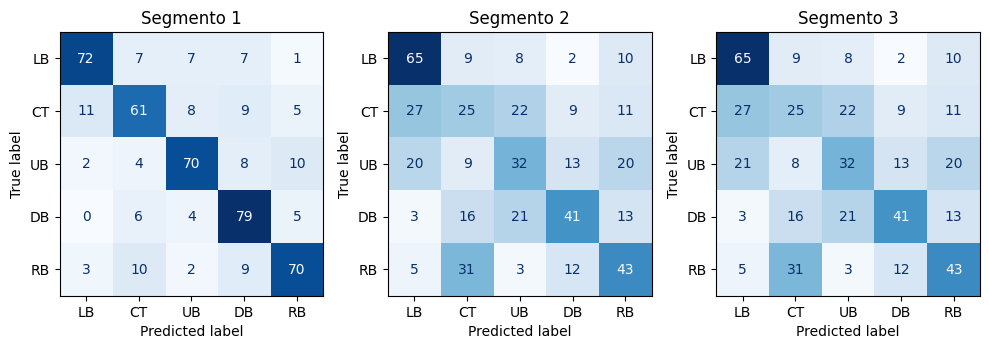

In [6]:
datos_lstm_rs_sw = pd.DataFrame(accuracy_score_lstm_rs_sw, columns=['LSTM_VAL'], index=(titulos_all_rs))

display(datos_lstm_rs_sw)

mc_lstm = []

for matrices_lstm in matriz_confusion_lstm_rs_sw:

    mc_lstm.append(pd.DataFrame(matrices_lstm, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(1, 3, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_lstm[0], mc_lstm[1], mc_lstm[2]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):

    ax = axs[i]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

,LSTM_TEST
All Segmentos after,0.809091
All Segmentos before,0.581818
Test Datos Reales,0.658333


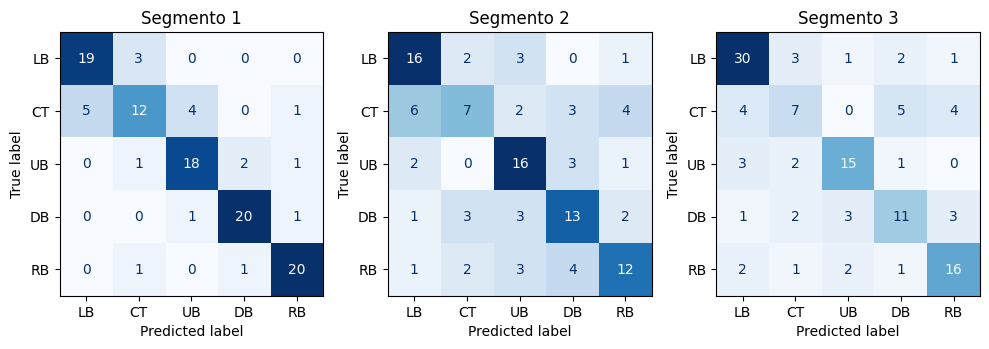

In [7]:
datos_lstm_rs_test_sw = pd.DataFrame(accuracy_score_test_lstm_rs_sw, columns=['LSTM_TEST'], index=(titulos_all_rs))

display(datos_lstm_rs_test_sw)

mc_lstm = []

for matrices_lstm in matriz_confusion_test_lstm_rs_sw:

    mc_lstm.append(pd.DataFrame(matrices_lstm, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(1, 3, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_lstm[0], mc_lstm[1], mc_lstm[2]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):

    ax = axs[i]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()